In [1]:
from IPython.display import Image, display

import os
import numpy as np
import matplotlib.pyplot as plt

import pickle
import sklearn
import pandas as pd

## Look at Plots

In [2]:
def plot_images(directory = "."):
    """ Plots all files ending in .png in given directory. """
    images = [i for i in os.listdir(directory) if i.endswith(".png")]

    fig = plt.figure(figsize=(15, 15))
    columns = len(images)
    rows = 1

    for x, i in enumerate(images):
        path =  os.path.join(directory, i)
        img = plt.imread(path)
        ax = fig.add_subplot(rows, columns, x+1)
        ax.title.set_text(i)
        plt.imshow(img)
    plt.show()

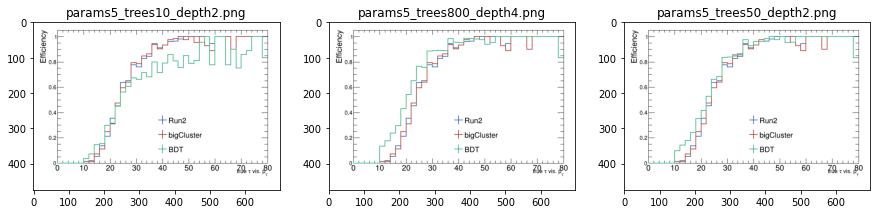

In [3]:
plot_images()

## Load Data

In [ ]:
def open_params_used(filename):
    with open(filename, "r") as f:
        return f.read().split()

In [9]:
params_used = open_params_used("params5_used.txt")
params_used

['reco_pt', 'reco_eta', 'reco_frac2', 'reco_max1', 'reco_max2']

In [65]:
def load_data(sig_filename, bg_filename, features):
    """ Returns X, Y for data stored in csv file"""
    
    sig_df = pd.read_csv(sig_filename)[features]
    bg_df = pd.read_csv(bg_filename)[features]
    
    sig_df["signal"] = 1
    bg_df["signal"] = 0
    
    df  = pd.concat([sig_df, bg_df], ignore_index=True)
    
    X = df.to_numpy()[:, :-1]
    Y = df.to_numpy()[:, -1][np.newaxis].transpose()
    # Y = np.reshape(Y, (Y.shape[0], 1))
    
    return df, X, Y

In [66]:
df, X, Y = load_data("sig.csv", "bg.csv", params_used)

In [67]:
display(df.head())
display(df["signal"].value_counts())

,reco_pt,reco_eta,reco_frac2,reco_max1,reco_max2,signal
0,22125.000000,0.55,0.668927,12.150,0.150,1
1,8375.000000,0.85,0.707463,2.625,0.925,1
2,10850.000381,0.95,0.605991,2.500,0.775,1
3,23549.999237,1.75,0.516985,4.500,2.475,1
4,8175.000191,0.05,0.186544,0.400,0.325,1


0    2551567
1      87629
Name: signal, dtype: int64

In [68]:
print(X.shape)
print(Y.shape)
print(np.concatenate((X, Y), axis=1).shape)

(2639196, 5)
(2639196, 1)
(2639196, 6)


## Process Data

In [69]:
def split_data(X, Y, test_percent=0.1):
    """returns X_train, Y_train, X_test, Y_test """
    total = np.concatenate((X, Y), axis=1)
    np.random.shuffle(total)
    n_X = (int) ((1 - test_percent) * total.shape[0])
    
    X_train = total[:n_X, :-1]
    X_test = total[n_X:, :-1]
    
    Y_train = total[:n_X, -1][np.newaxis].transpose()
    Y_test = total[n_X:, -1][np.newaxis].transpose()
    
    return X_train, Y_train, X_test, Y_test

In [70]:
X_train, Y_train, X_test, Y_test = split_data(X, Y)
print(f"X_train: {X_train.shape} Y_train: {Y_train.shape}")
print(f"X_test: {X_test.shape} Y_test: {Y_test.shape}")

X_train: (2375276, 5) Y_train: (2375276, 1)
X_test: (263920, 5) Y_test: (263920, 1)


## Load Model

In [73]:
def open_model(filename):
    """ Returns sklearn stored in pickle file."""
    with open(filename, 'rb') as f:
        return pickle.load(f)

In [89]:
model = open_model("params17_trees800_depth4.pkl")
model

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(max_depth=4),
                   n_estimators=800)

In [77]:
Y_train_h = model.predict(X_test)

In [81]:
pd.Series(Y_train_h).value_counts()

0.0    258593
1.0      5327
dtype: int64

## Plotting

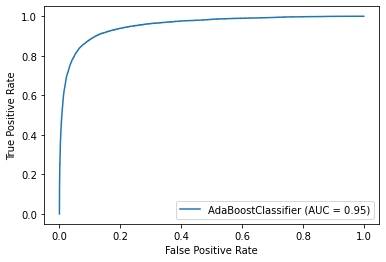

In [82]:
sklearn.metrics.plot_roc_curve(model, X_test, Y_test)